In [7]:
import tkinter as tk
from tkinter import ttk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.preprocessing import LabelEncoder
import warnings

In [4]:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

In [3]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
print("Number of Symtoms related to a Disease: ",train.shape[1]-1)
print("Number of Classes/Label Present in a Dataset: ",train['prognosis'].nunique())

Number of Symtoms related to a Disease:  133
Number of Classes/Label Present in a Dataset:  41


In [5]:
train["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

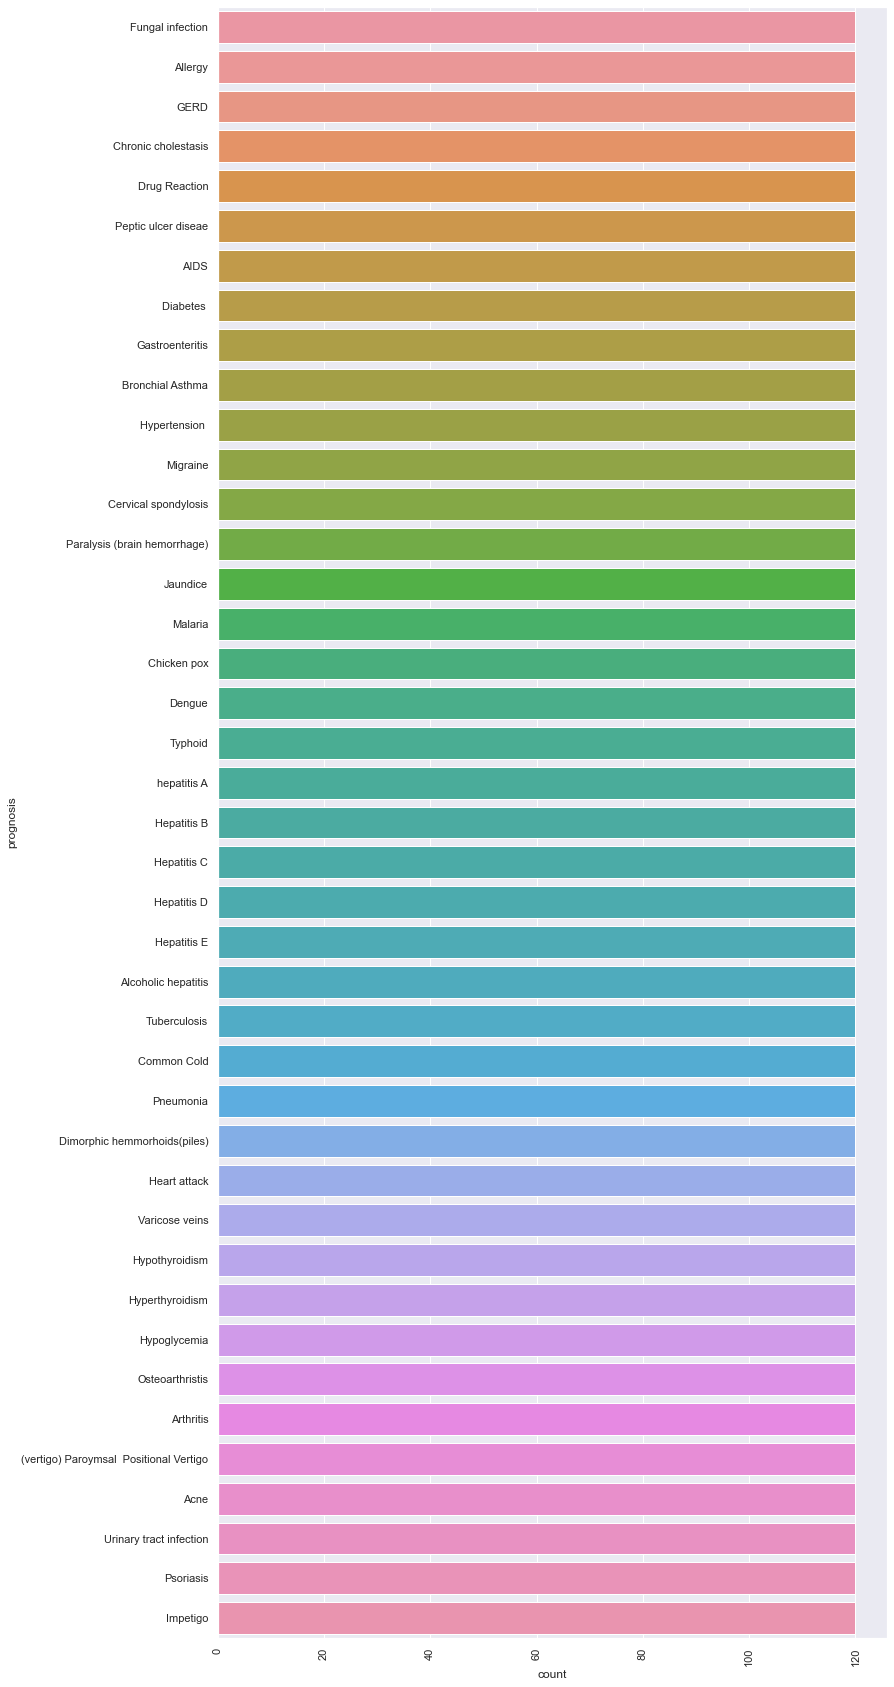

In [9]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train)
print(train["prognosis"].value_counts())

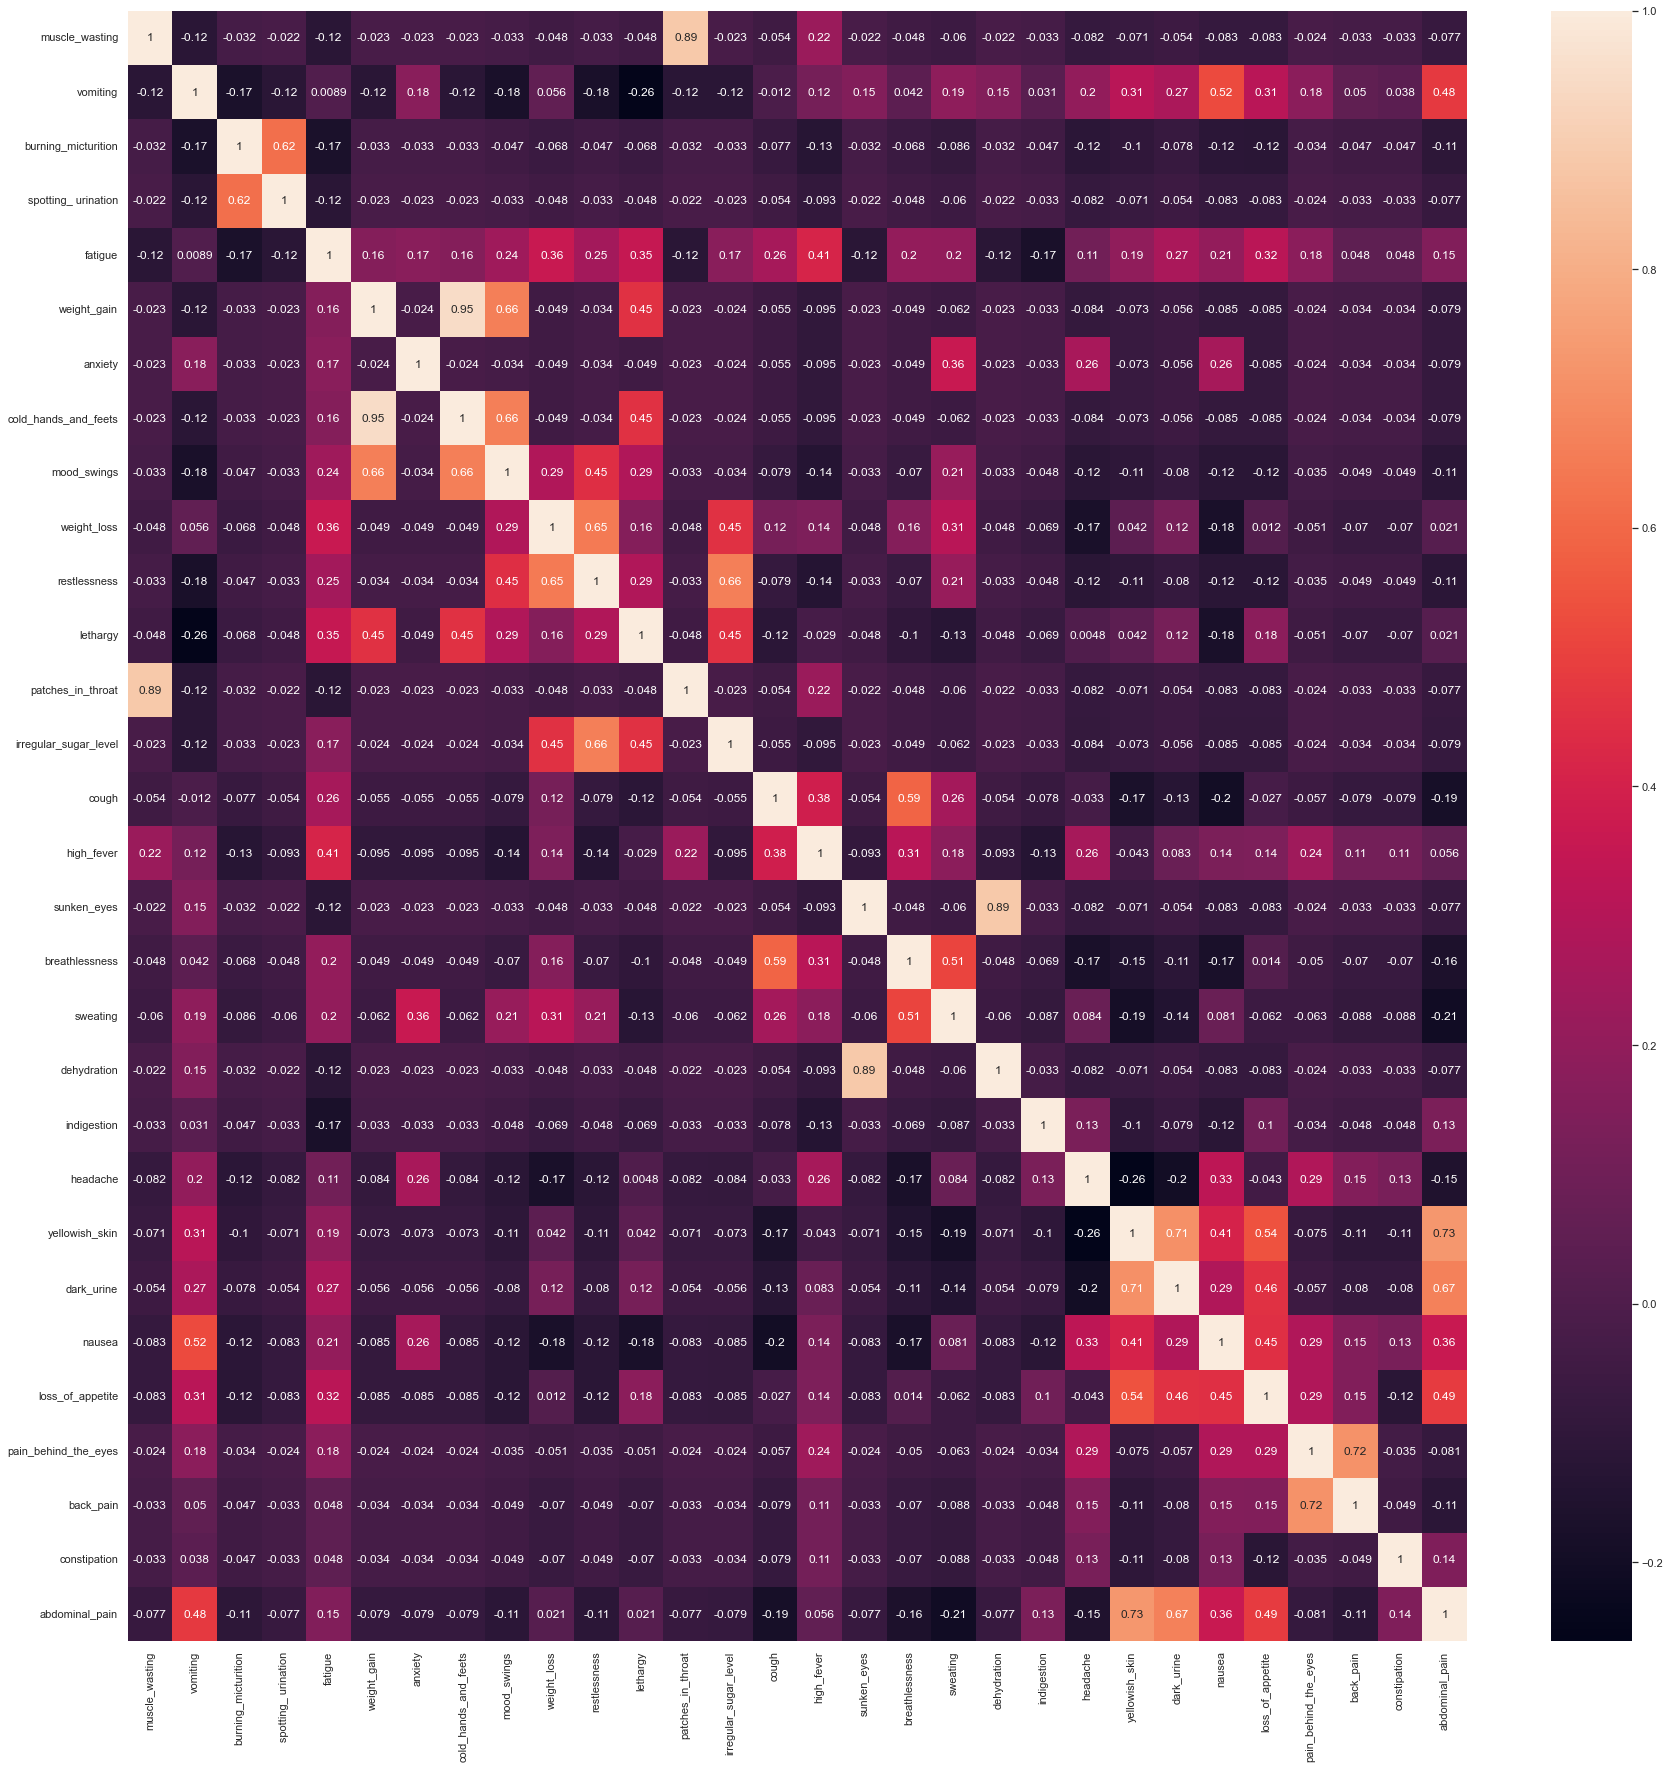

In [10]:
#Linear Relationship between some of the features using correlation heat map
df_corr = train.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

### Data Cleaning

In [12]:
train.drop("Unnamed: 133", axis = 1, inplace = True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [15]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Frequen Symptoms Using Apriori Algorithm

    support            itemsets
0  0.389024          (vomiting)
1  0.392683           (fatigue)
2  0.276829        (high_fever)
3  0.230488          (headache)
4  0.232927            (nausea)
5  0.234146  (loss_of_appetite)
6  0.209756    (abdominal_pain)


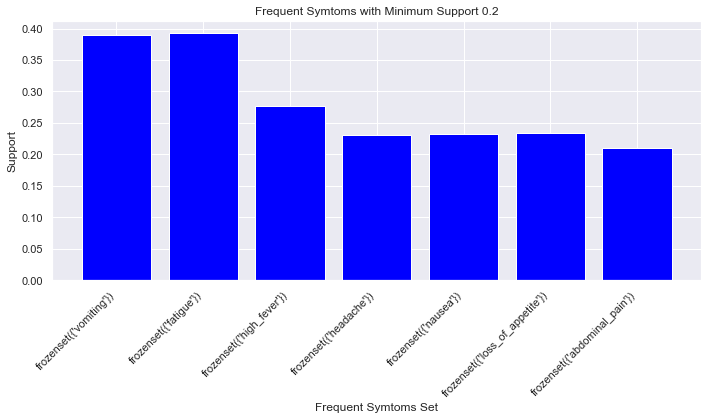

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
warnings.filterwarnings('ignore')

min_support = 0.2
frequent_itemsets = apriori(train.drop('prognosis', axis=1), min_support=min_support, use_colnames=True)
print(frequent_itemsets)
plt.figure(figsize=(10, 6))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='blue')
plt.xlabel('Frequent Symtoms Set')
plt.ylabel('Support')
plt.title(f'Frequent Symtoms with Minimum Support {min_support}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Disease Prediction Using Logistic regression Algorithm

Confusion Matrix:
[[33  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 24]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        33
                                   AIDS       1.00      1.00      1.00        26
                                   Acne       1.00      1.00      1.00        26
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        20
                   Cervical spondylosis       1.00      1.00      1.00        25
                            Chicken pox       1.00      1.00      1.00   

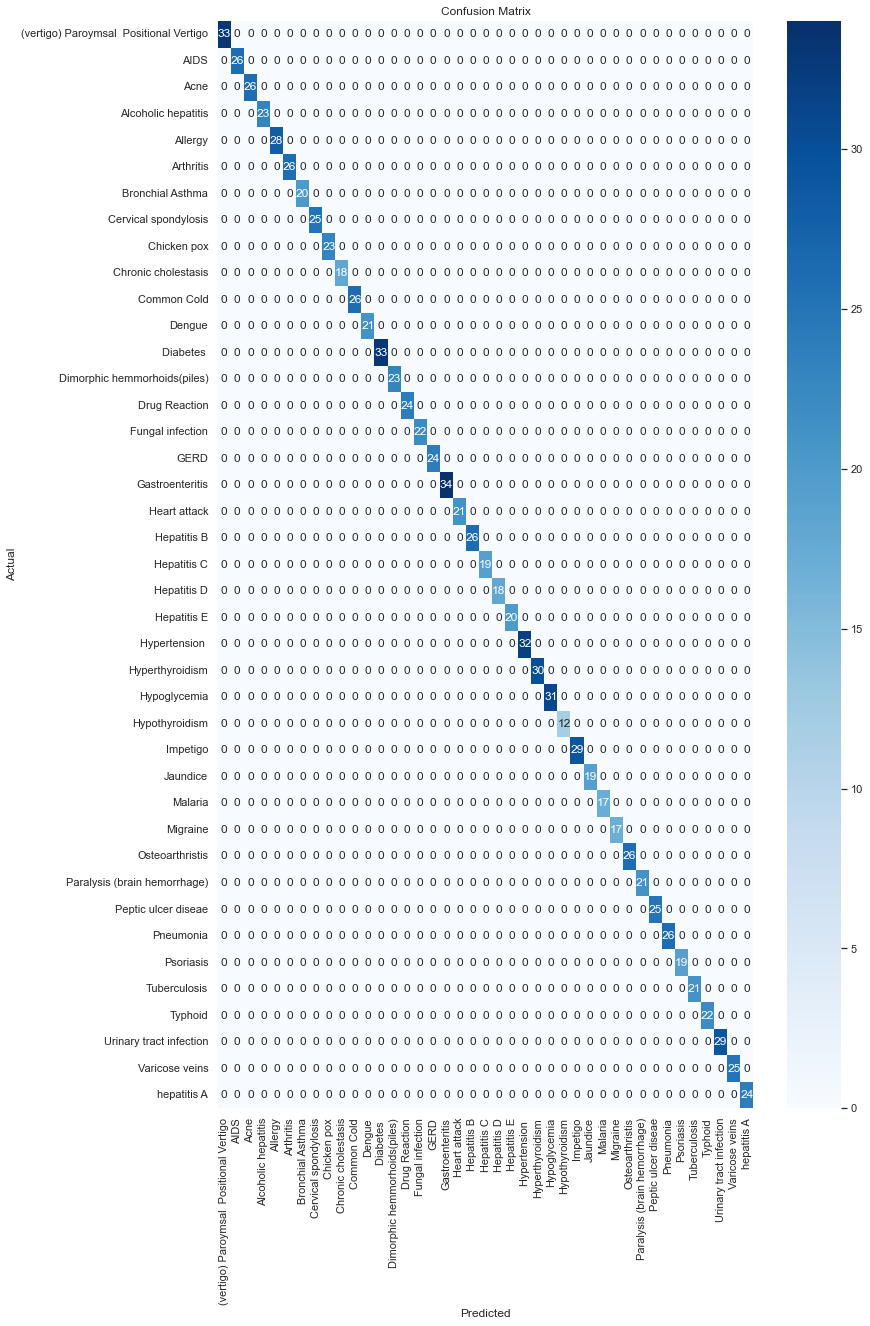

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

df = train
label_encoder = LabelEncoder()
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

X = df.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = df['prognosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Disease Prediction using Desicion Tree

C:\Users\PRADEEP SAI TEJA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 29]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        20
                    Alcoholic hepatitis       1.00      1.00      1.00        22
                                Allergy       1.00      1.00      1.00        23
                              Arthritis       1.00      1.00      1.00        29
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        22
                            Chicken pox       1.00      1.00      1.00   

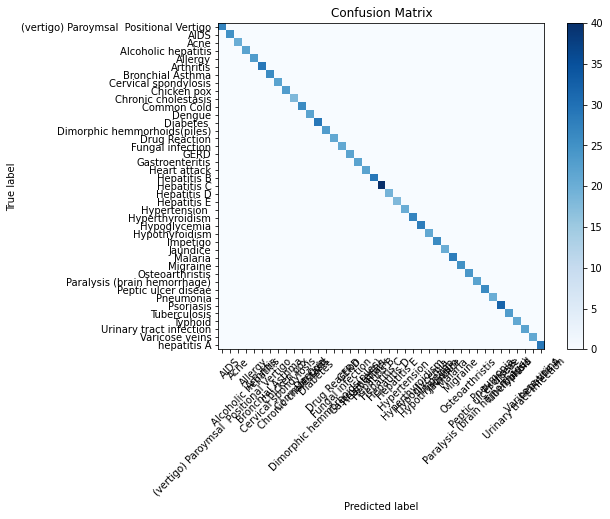

|--- coma <= 0.50
|   |--- rusty_sputum <= 0.50
|   |   |--- brittle_nails <= 0.50
|   |   |   |--- pain_behind_the_eyes <= 0.50
|   |   |   |   |--- red_spots_over_body <= 0.50
|   |   |   |   |   |--- blood_in_sputum <= 0.50
|   |   |   |   |   |   |--- bladder_discomfort <= 0.50
|   |   |   |   |   |   |   |--- swollen_legs <= 0.50
|   |   |   |   |   |   |   |   |--- toxic_look_(typhos) <= 0.50
|   |   |   |   |   |   |   |   |   |--- lack_of_concentration <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- congestion <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 49
|   |   |   |   |   |   |   |   |   |   |--- congestion >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 10
|   |   |   |   |   |   |   |   |   |--- lack_of_concentration >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 23
|   |   |   |   |   |   |   |   |--- toxic_look_(typhos) >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 37
|   |   |   |   |   

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Training.csv')
df = df.fillna(0)

label_encoder = LabelEncoder()
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

X = df.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = df['prognosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def predict_prognosis():
    user_symptoms = [int(var.get()) for var in checkboxes]

    predicted_prognosis_encoded = model.predict([user_symptoms])[0]
    predicted_prognosis = label_encoder.inverse_transform([predicted_prognosis_encoded])[0]

    # Get the actual disease for the first entry in the test set
    actual_prognosis_encoded = y_test.iloc[0]
    actual_prognosis = label_encoder.inverse_transform([actual_prognosis_encoded])[0]

    result_label.config(text=f"Predicted Disease: {predicted_prognosis}\nActual Disease: {actual_prognosis}")

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("Classification Report:")
    print(report)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = label_encoder.classes_
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()

root = tk.Tk()
root.title("Symptom Checker")

name_label = tk.Label(root, text="Patient Name:")
name_label.grid(row=0, column=0, sticky='w')
name_entry = tk.Entry(root)
name_entry.grid(row=0, column=1, sticky='w')

age_label = tk.Label(root, text="Patient Age:")
age_label.grid(row=1, column=0, sticky='w')
age_entry = tk.Entry(root)
age_entry.grid(row=1, column=1, sticky='w')

canvas = tk.Canvas(root)
canvas.grid(row=2, column=0, sticky='nsew')

checkbox_frame = ttk.Frame(canvas)

scrollbar = ttk.Scrollbar(root, orient='vertical', command=canvas.yview)
scrollbar.grid(row=2, column=1, sticky='ns')
canvas.configure(yscrollcommand=scrollbar.set)

canvas.create_window((0, 0), window=checkbox_frame, anchor='nw')

def configure_canvas(event):
    canvas.configure(scrollregion=canvas.bbox("all"))

checkbox_frame.bind("<Configure>", configure_canvas)

checkboxes = []
for i, symptom in enumerate(X.columns):
    var = tk.IntVar()
    checkbox = tk.Checkbutton(checkbox_frame, text=symptom, variable=var)
    checkbox.grid(row=i, column=0, sticky='w')
    checkboxes.append(var)

predict_button = tk.Button(root, text="Predict", command=predict_prognosis)
predict_button.grid(row=3, column=0)

result_label = tk.Label(root, text="")
result_label.grid(row=4, column=0)

root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(0, weight=1)

root.mainloop()
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy)}")

### Disease prediction using K neighbours Classifier

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

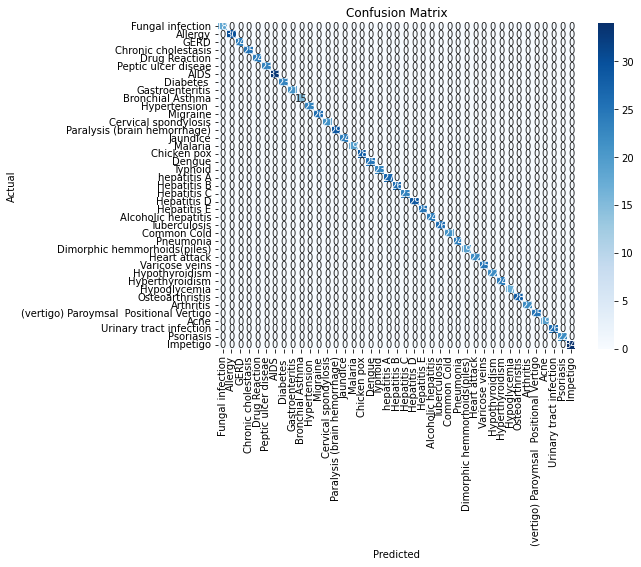

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

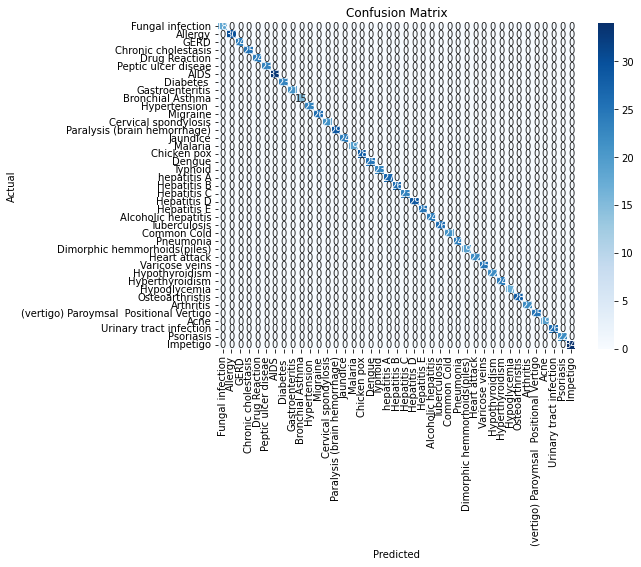

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

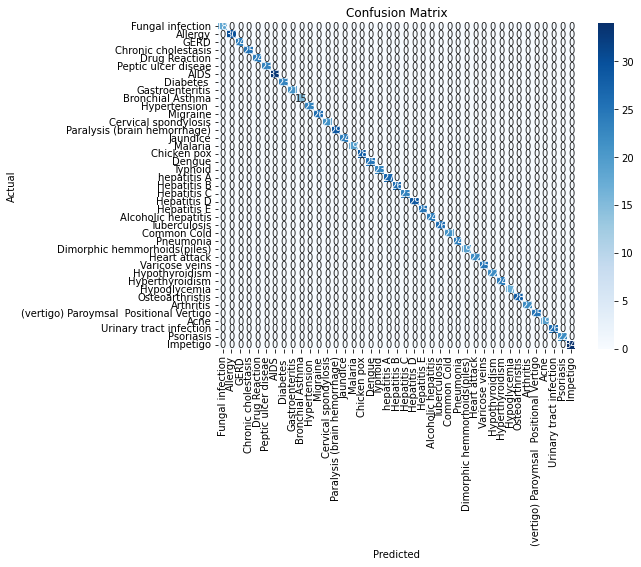

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

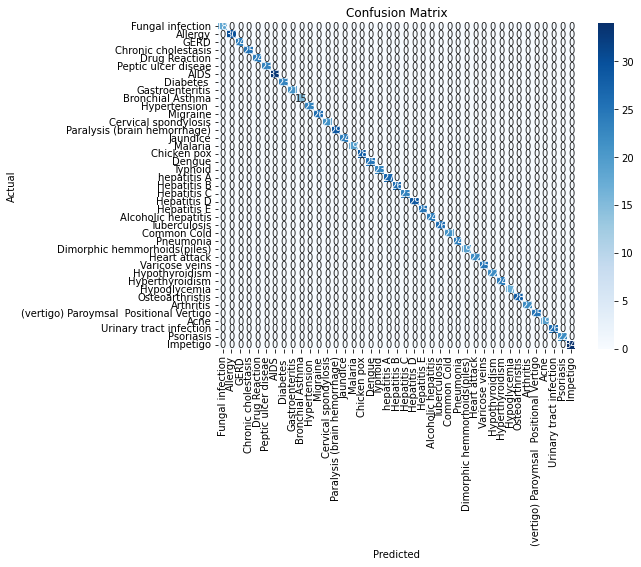

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

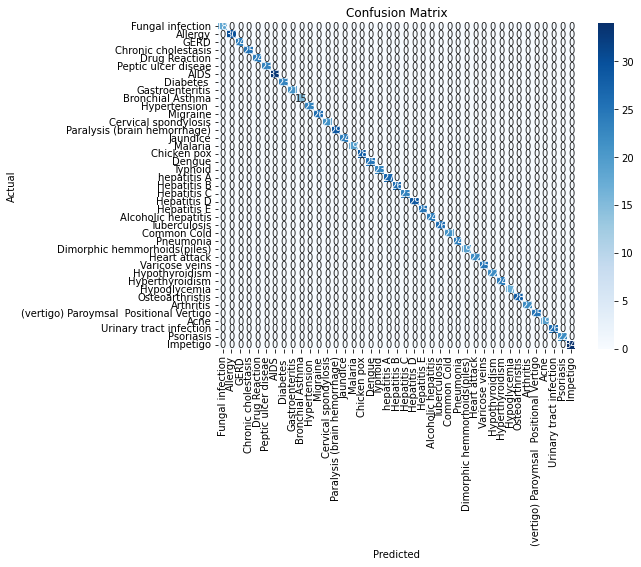

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        30
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        25
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        23
                        Gastroenteritis       1.00      1.00      1.00   

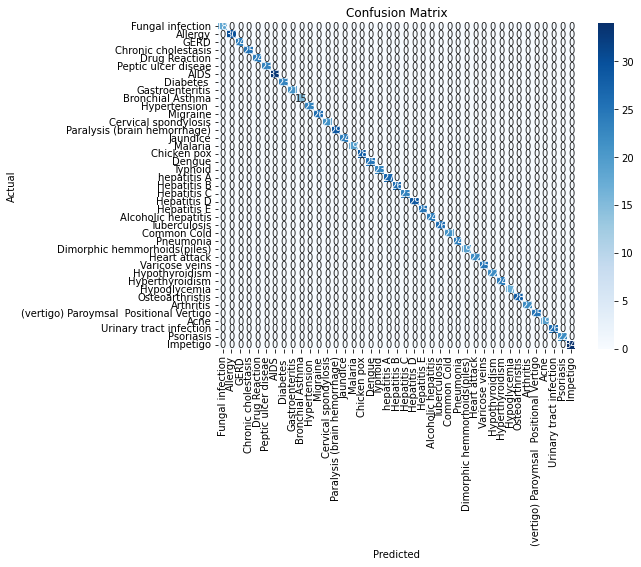

In [1]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('Training.csv')
df = df.fillna(0)

X = df.drop('prognosis', axis=1)
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

def predict_prognosis():
    user_symptoms = [int(var.get()) for var in checkboxes]

    predicted_prognosis = knn_model.predict([user_symptoms])[0]

    result_label.config(text=f"Predicted Prognosis: {predicted_prognosis}")

    y_pred = knn_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred, target_names=df['prognosis'].unique())
    print("Classification Report:")
    print(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['prognosis'].unique(), yticklabels=df['prognosis'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

root = tk.Tk()
root.title("Symptom Checker")

canvas = tk.Canvas(root)
canvas.grid(row=2, column=0, sticky='nsew')

checkbox_frame = ttk.Frame(canvas)

scrollbar = ttk.Scrollbar(root, orient='vertical', command=canvas.yview)
scrollbar.grid(row=2, column=1, sticky='ns')
canvas.configure(yscrollcommand=scrollbar.set)

canvas.create_window((0, 0), window=checkbox_frame, anchor='nw')

def configure_canvas(event):
    canvas.configure(scrollregion=canvas.bbox("all"))

checkbox_frame.bind("<Configure>", configure_canvas)

checkboxes = []
for i, symptom in enumerate(X.columns):
    var = tk.IntVar()
    checkbox = tk.Checkbutton(checkbox_frame, text=symptom, variable=var)
    checkbox.grid(row=i, column=0, sticky='w')
    checkboxes.append(var)

predict_button = tk.Button(root, text="Predict", command=predict_prognosis)
predict_button.grid(row=3, column=0)

result_label = tk.Label(root, text="")
result_label.grid(row=4, column=0)

root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(0, weight=1)

root.mainloop()

### Disease prediction using Random forest

Confusion Matrix:
[[28  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 23]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        28
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        26
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00        22
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        26
                            Chicken pox       1.00      1.00      1.00   

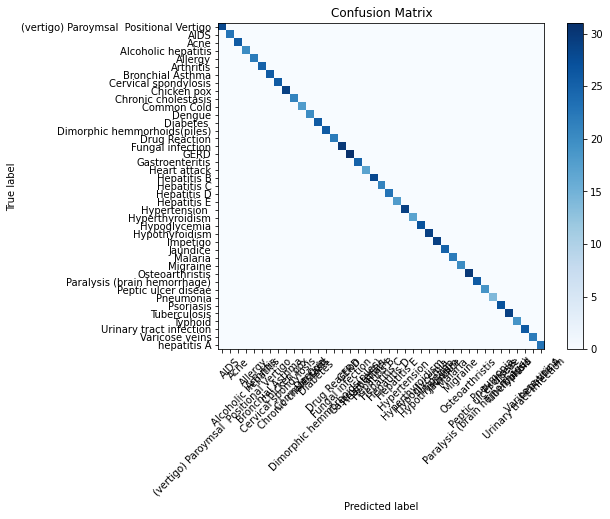

|--- irregular_sugar_level <= 0.50
|   |--- small_dents_in_nails <= 0.50
|   |   |--- receiving_blood_transfusion <= 0.50
|   |   |   |--- redness_of_eyes <= 0.50
|   |   |   |   |--- visual_disturbances <= 0.50
|   |   |   |   |   |--- phlegm <= 0.50
|   |   |   |   |   |   |--- swelling_of_stomach <= 0.50
|   |   |   |   |   |   |   |--- coma <= 0.50
|   |   |   |   |   |   |   |   |--- enlarged_thyroid <= 0.50
|   |   |   |   |   |   |   |   |   |--- toxic_look_(typhos) <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- shivering <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 36
|   |   |   |   |   |   |   |   |   |   |--- shivering >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |   |--- toxic_look_(typhos) >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 37.0
|   |   |   |   |   |   |   |   |--- enlarged_thyroid >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 26.0
|   |   |

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('Training.csv')
df = df.fillna(0)

# Encode the target variable
label_encoder = LabelEncoder()
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

# Separate features and target variable
X = df.drop(['prognosis', 'prognosis_encoded'], axis=1)
y = df['prognosis_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed
model.fit(X_train, y_train)

# Function to predict prognosis and display results
def predict_prognosis():
    user_symptoms = [int(var.get()) for var in checkboxes]

    # Predict using the Random Forest model
    predicted_prognosis_encoded = model.predict([user_symptoms])[0]
    predicted_prognosis = label_encoder.inverse_transform([predicted_prognosis_encoded])[0]

    # Get the actual disease for the first entry in the test set
    actual_prognosis_encoded = y_test.iloc[0]
    actual_prognosis = label_encoder.inverse_transform([actual_prognosis_encoded])[0]

    # Display results
    result_label.config(text=f"Predicted Disease: {predicted_prognosis}\nActual Disease: {actual_prognosis}")

    # Evaluate the model
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("Classification Report:")
    print(report)

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = label_encoder.classes_
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()

# Create the Tkinter GUI
root = tk.Tk()
root.title("Symptom Checker")

# GUI components for patient information
name_label = tk.Label(root, text="Patient Name:")
name_label.grid(row=0, column=0, sticky='w')
name_entry = tk.Entry(root)
name_entry.grid(row=0, column=1, sticky='w')

age_label = tk.Label(root, text="Patient Age:")
age_label.grid(row=1, column=0, sticky='w')
age_entry = tk.Entry(root)
age_entry.grid(row=1, column=1, sticky='w')

# Canvas for checkboxes
canvas = tk.Canvas(root)
canvas.grid(row=2, column=0, sticky='nsew')

checkbox_frame = ttk.Frame(canvas)

# Scrollbar for canvas
scrollbar = ttk.Scrollbar(root, orient='vertical', command=canvas.yview)
scrollbar.grid(row=2, column=1, sticky='ns')
canvas.configure(yscrollcommand=scrollbar.set)

canvas.create_window((0, 0), window=checkbox_frame, anchor='nw')

# Function to configure canvas
def configure_canvas(event):
    canvas.configure(scrollregion=canvas.bbox("all"))

checkbox_frame.bind("<Configure>", configure_canvas)

# Create checkboxes for symptoms
checkboxes = []
for i, symptom in enumerate(X.columns):
    var = tk.IntVar()
    checkbox = tk.Checkbutton(checkbox_frame, text=symptom, variable=var)
    checkbox.grid(row=i, column=0, sticky='w')
    checkboxes.append(var)

# Button to predict prognosis
predict_button = tk.Button(root, text="Predict", command=predict_prognosis)
predict_button.grid(row=3, column=0)

# Label to display results
result_label = tk.Label(root, text="")
result_label.grid(row=4, column=0)

# Set weights for row and column
root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(0, weight=1)

# Main loop for Tkinter GUI
root.mainloop()

# Display rules of the first decision tree in the forest
from sklearn.tree import export_text

tree_rules = export_text(model.estimators_[0], feature_names=list(X.columns))
print(tree_rules)

# Perform cross-validation with the Random Forest model
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy)}")


### Comparing Accuracies Of Different Model

C:\Users\PRADEEP SAI TEJA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


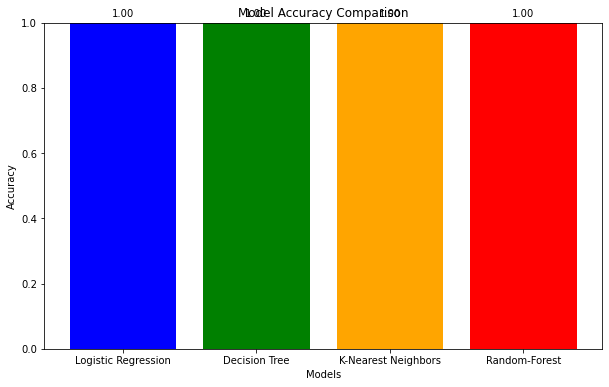

Accuracy - Logistic Regression: 1.00
Accuracy - Decision Tree: 1.00
Accuracy - K-Nearest Neighbors: 1.00
Accuracy - Random Forest: 1.00


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = df.drop('prognosis', axis=1) 
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

randomForest = RandomForestClassifier(n_estimators=100,random_state=5)
randomForest.fit(X_train,y_train)

y_pred_logistic = logistic_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_random = randomForest.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_random = accuracy_score(y_test,y_pred_random)

models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors','Random-Forest']
accuracies = [accuracy_logistic, accuracy_tree, accuracy_knn,accuracy_random]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange','red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, value in enumerate(accuracies):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()

print(f'Accuracy - Logistic Regression: {accuracy_logistic:.2f}')
print(f'Accuracy - Decision Tree: {accuracy_tree:.2f}')
print(f'Accuracy - K-Nearest Neighbors: {accuracy_knn:.2f}')
print(f'Accuracy - Random Forest: {accuracy_random:.2f}')